#Forbes Billioners EDA

## Import Required Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

import warnings
warnings.filterwarnings('ignore')

##Loading Data

In [2]:
df = pd.read_csv('Forbes Billionaires.csv')

In [3]:
# lets check the glimpse of first five rows of our dataframe
df.head()

,Rank,Name,Networth,Age,Country,Source,Industry
0,1,Elon Musk,219.0,50,United States,"Tesla, SpaceX",Automotive
1,2,Jeff Bezos,171.0,58,United States,Amazon,Technology
2,3,Bernard Arnault & family,158.0,73,France,LVMH,Fashion & Retail
3,4,Bill Gates,129.0,66,United States,Microsoft,Technology
4,5,Warren Buffett,118.0,91,United States,Berkshire Hathaway,Finance & Investments


##Data Description

Rank: Rank of the person according to
their wealth.
Name: Name of the billionaires.
Networth: The Net worth in all the forms included (in US Billion dollars).
Age: Age of the person.
Country: Country or Region, the billionaires belongs to.
Source: The immediate source of their wealth (their company).
Industry: Industry they are into.

In [4]:
# shape of dataframe
df.shape

(2600, 7)

In [5]:
# Getting an overview of our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rank      2600 non-null   int64  
 1   Name      2600 non-null   object 
 2   Networth  2600 non-null   float64
 3   Age       2600 non-null   int64  
 4   Country   2600 non-null   object 
 5   Source    2600 non-null   object 
 6   Industry  2600 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 142.3+ KB


In [6]:
# summary statistics
df.describe()

,Rank,Networth,Age
count,2600.000000,2600.000000,2600.000000
mean,1269.570769,4.860750,64.271923
std,728.146364,10.659671,13.220607
min,1.000000,1.000000,19.000000
25%,637.000000,1.500000,55.000000
50%,1292.000000,2.400000,64.000000
75%,1929.000000,4.500000,74.000000
max,2578.000000,219.000000,100.000000


In [7]:
# lets check for missing values
df.isnull().sum()

Rank        0
Name        0
Networth    0
Age         0
Country     0
Source      0
Industry    0
dtype: int64

No Missing values Found!! It looks like data is already pre-processed so we can jump directly to EDA.

##Exploratory Data Analysis

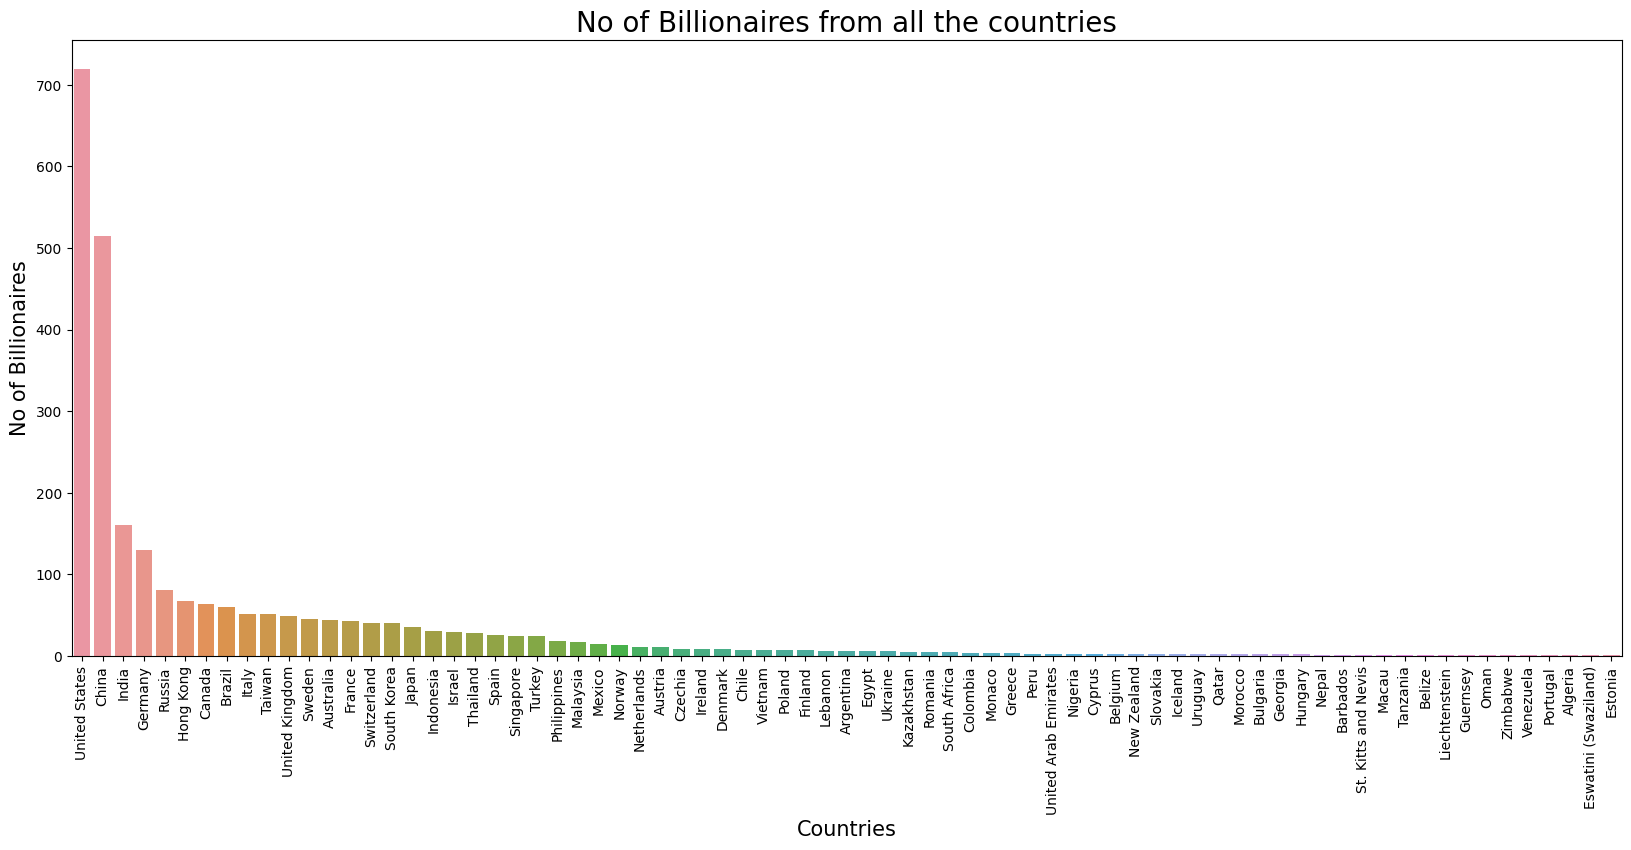

In [8]:
# Top 10 Countries with most billionaires
plt.figure(figsize=(20,8))
sns.countplot( data=df, x="Country", order=df['Country'].value_counts().index)
plt.xticks(rotation=90)
plt.ylabel("No of Billionaires", fontsize=15)
plt.xlabel("Countries", fontsize=15)
plt.title("No of Billionaires from all the countries", fontsize=20)
plt.show()

In [9]:
# Top 10 countries with most billionaires
df['Country'].value_counts().nlargest(10)

United States    719
China            515
India            161
Germany          130
Russia            81
Hong Kong         67
Canada            64
Brazil            60
Italy             52
Taiwan            51
Name: Country, dtype: int64

Is the country with the most billionaires the one with the most wealth?

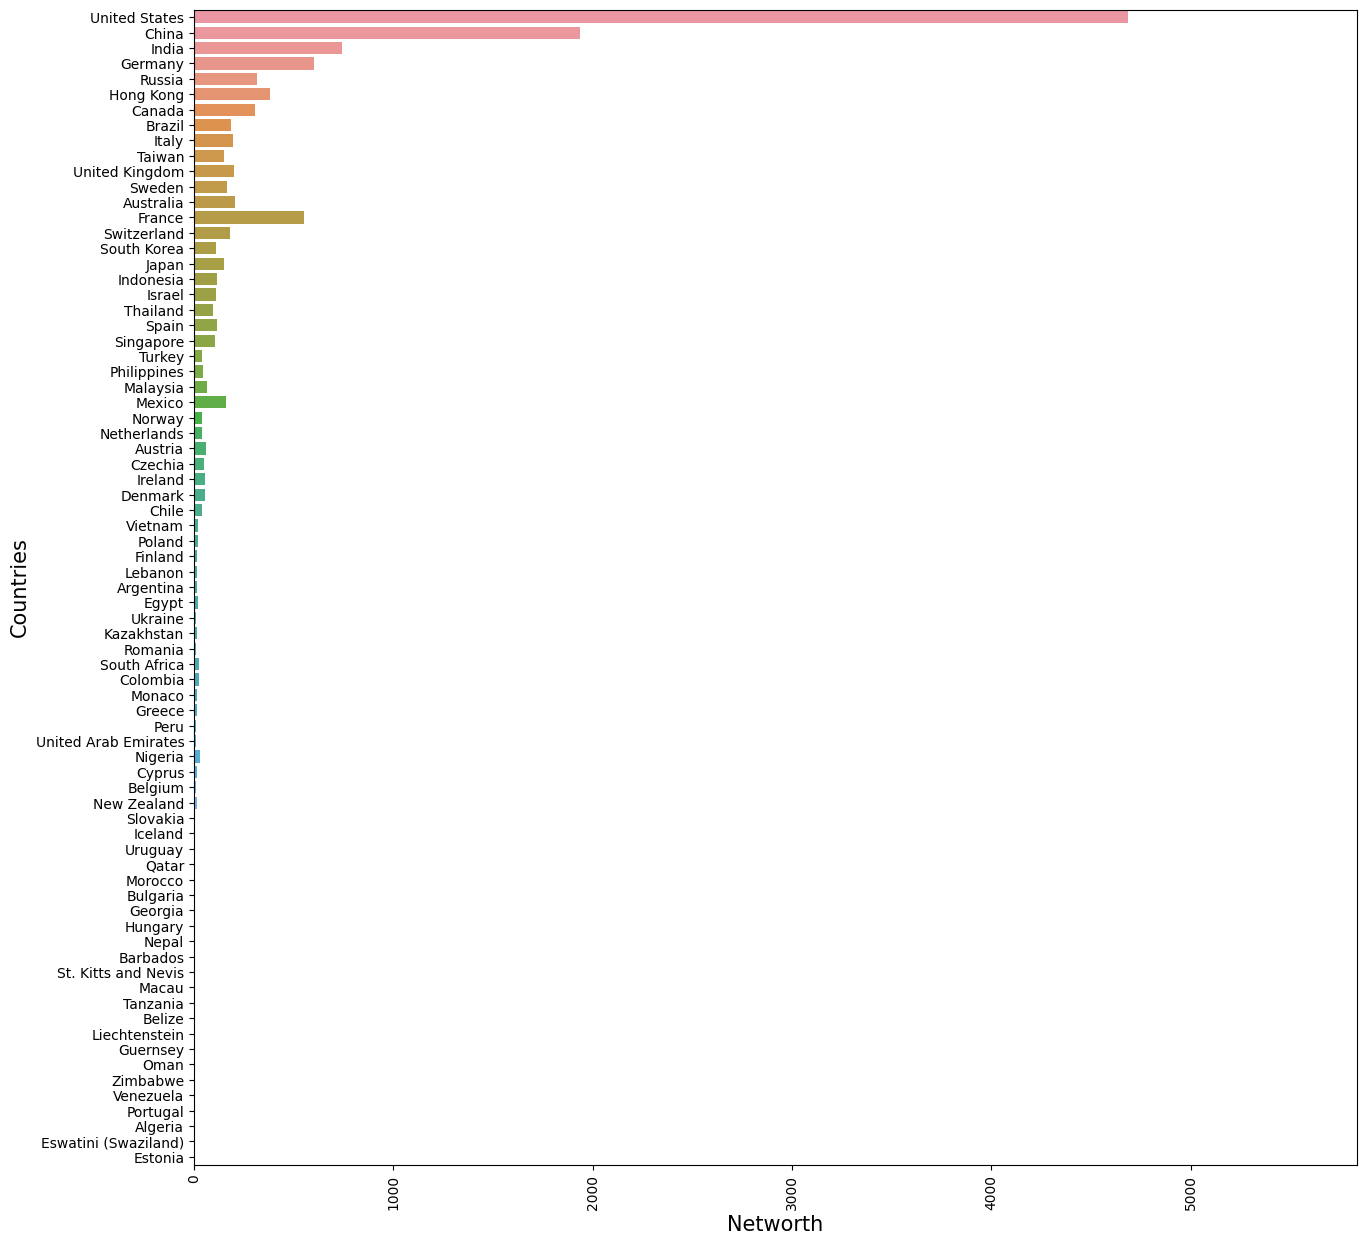

In [10]:
plt.figure(figsize=(15,15))
sns.barplot(data=df, x = "Networth", y = "Country", order = df['Country'].value_counts().index, estimator = sum , errwidth = 0)
plt.xticks(rotation=90)
plt.xlabel("Networth", fontsize=15)
plt.ylabel("Countries", fontsize=15)
plt.show()

The answer seems to be yes but we can see that France has more money than countries which have more billionaires since it's sorted by the number of billionaires in the chart.

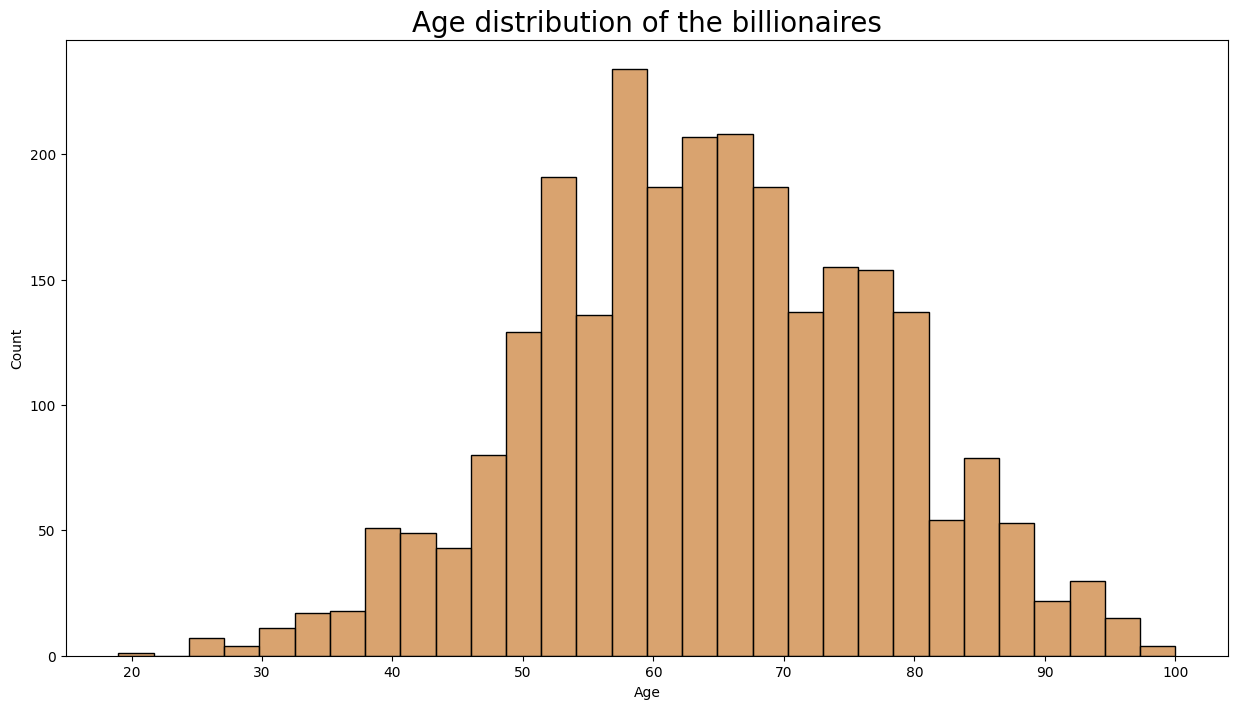

In [11]:
#How old are billionairs?
plt.figure(figsize = (15,8))
sns.histplot(data = df, x = 'Age', color = 'peru')
plt.title('Age distribution of the billionaires',fontsize=20)
plt.show()

Most of the Billionaires belongs to 50-70 years of age group. lets check who is youngest billionaire.

In [12]:
#Who is the Youngest Billionaire?
df.loc[df.Age == df.Age.min()]

,Rank,Name,Networth,Age,Country,Source,Industry
1311,1292,Kevin David Lehmann,2.4,19,Germany,drugstores,Fashion & Retail


Kevin David Lehmann is a german investor. He is best known as the son of German billionaire Guenther Lehmann, who made his fortune by investing in a drugstore.

In [13]:
#Age Group of Billionaires?
df['age_group'] = pd.cut(df['Age'], bins = [18, 30, 50, 70, 100], include_lowest = True, labels = ['18-30', '30-50', '50-70','70+'])
df.head()

,Rank,Name,Networth,Age,Country,Source,Industry,age_group
0,1,Elon Musk,219.0,50,United States,"Tesla, SpaceX",Automotive,30-50
1,2,Jeff Bezos,171.0,58,United States,Amazon,Technology,50-70
2,3,Bernard Arnault & family,158.0,73,France,LVMH,Fashion & Retail,70+
3,4,Bill Gates,129.0,66,United States,Microsoft,Technology,50-70
4,5,Warren Buffett,118.0,91,United States,Berkshire Hathaway,Finance & Investments,70+


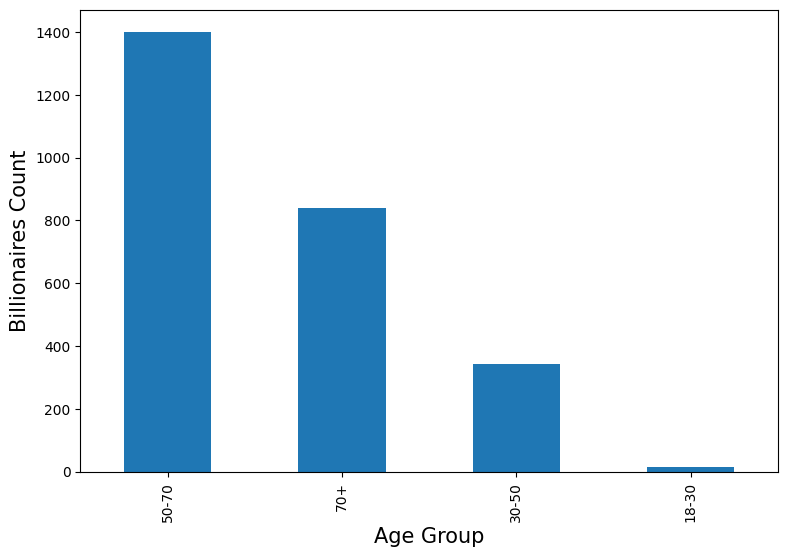

In [14]:
df['age_group'].value_counts().plot(kind='bar', figsize=(9,6))
plt.xlabel("Age Group", fontsize=15)
plt.ylabel("Billionaires Count", fontsize=15)
plt.show()

Most of the Billionaires are of 50 or more than 50 years old.

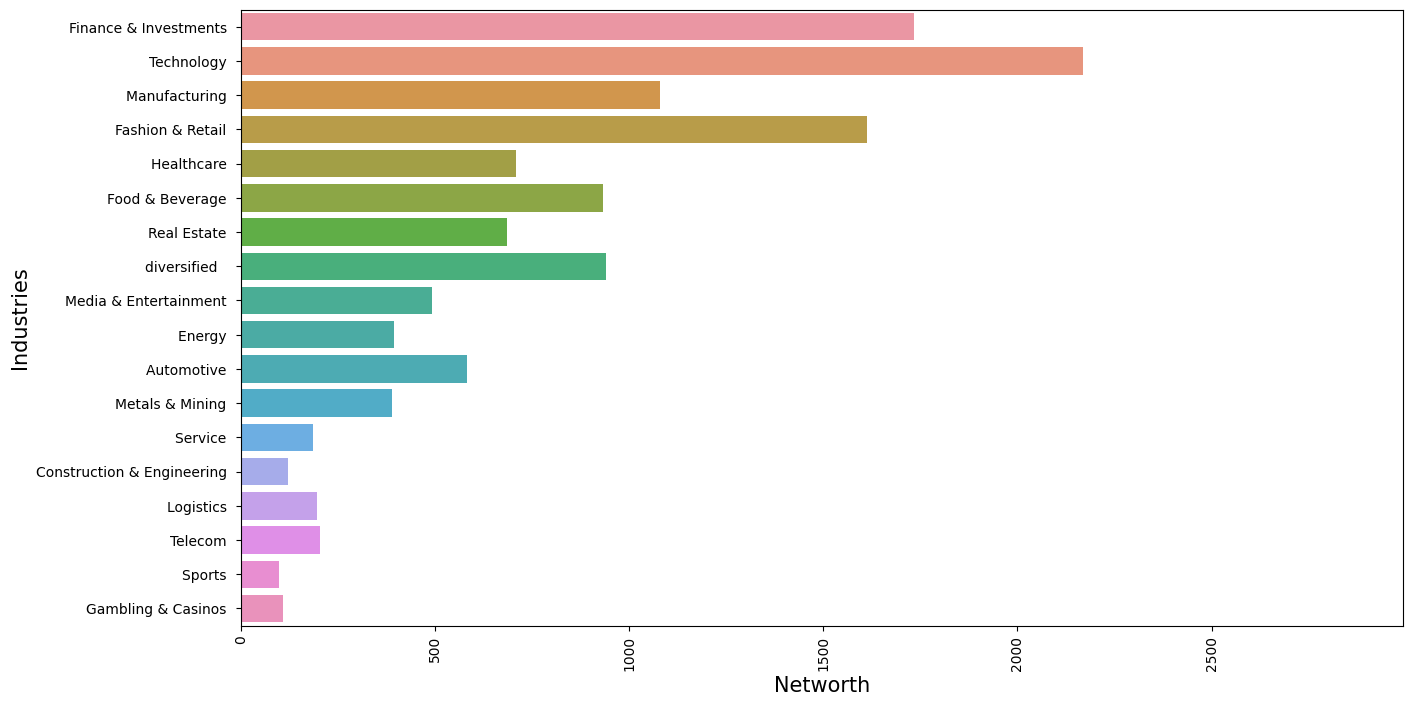

In [15]:
#What billionairs do?
plt.figure(figsize=(15,8))
sns.barplot(data=df, x = "Networth", y = "Industry", order = df['Industry'].value_counts().index, estimator = sum , errwidth = 0)
plt.xticks(rotation=90)
plt.xlabel("Networth", fontsize=15)
plt.ylabel("Industries", fontsize=15)
plt.show()

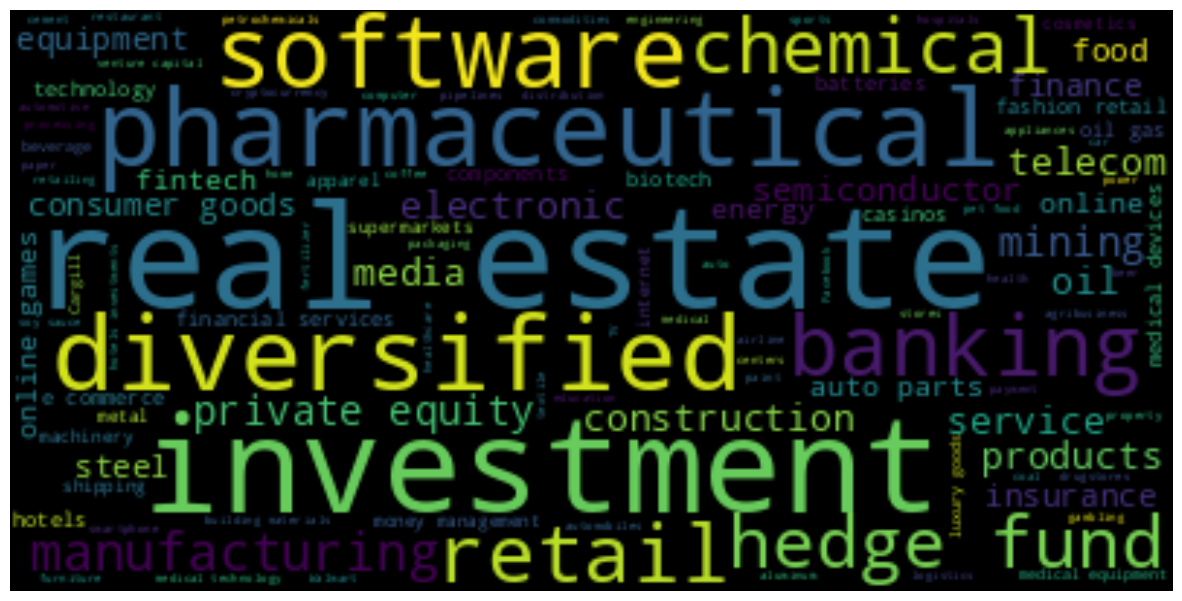

In [16]:
#Where does this money come from ( Source of Billionaires ) ?
stopwords = set(STOPWORDS)
text = " ".join(i for i in df.Source)

plt.figure( figsize=(15,10))
wordcloud = WordCloud(
                      stopwords=stopwords,
                      max_words=200,
                      max_font_size=50,
                      random_state=50
                     ).generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');
plt.show();

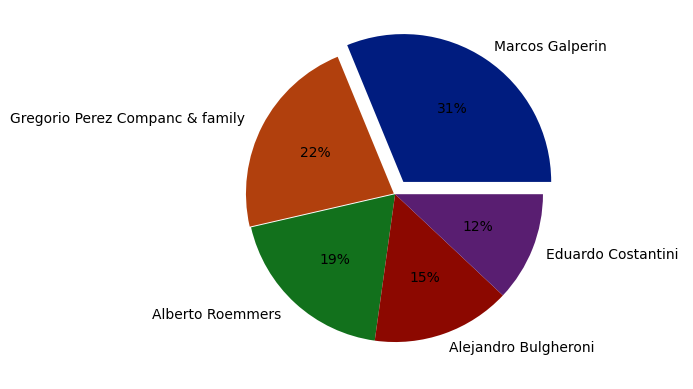

In [17]:
#Top 5 Billionaires from Argentina ?
argentina = df[df['Country'] == 'Argentina']
top_5_argentina = argentina.sort_values('Networth',ascending=False).head()
# declaring exploding pie
explode = [0.1, 0.01, 0, 0, 0]
# define Seaborn color palette to use
palette_color = sns.color_palette('dark')

# plotting data on chart
plt.pie(top_5_argentina['Networth'], labels=top_5_argentina['Name'], colors=palette_color,
        explode=explode, autopct='%.0f%%')

# displaying chart
plt.show()

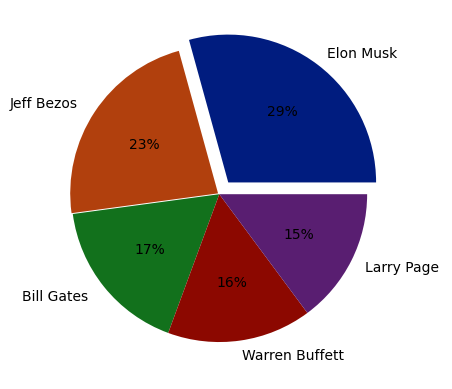

In [18]:
#Top 5 Billionaires from United States ?
us_df = df[df['Country'] == 'United States'].sort_values('Networth',ascending=False).head()
us_df

# plotting data on chart
plt.pie(us_df['Networth'], labels=us_df['Name'], colors=palette_color,
        explode=explode, autopct='%.0f%%')

# displaying chart
plt.show()

# THE END